In [2]:
import pandas as pd
import numpy as np
import json

## Loading Data

In [2]:
df1 = []
file = 'Video_Games.jsonl'
with open(file, 'r') as fp:
    for line in fp:
        df1.append(json.loads(line.strip()))

In [3]:
df1 = pd.DataFrame(df1)
df1.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,4.0,It’s pretty sexual. Not my fav,I’m playing on ps5 and it’s interesting. It’s...,[],B07DJWBYKP,B07DK1H3H5,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,1608186804795,0,True
1,5.0,Good. A bit slow,Nostalgic fun. A bit slow. I hope they don’t...,[],B00ZS80PC2,B07SRWRH5D,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,1587051114941,1,False
2,5.0,... an order for my kids & they have really en...,This was an order for my kids & they have real...,[],B01FEHJYUU,B07MFMFW34,AGXVBIUFLFGMVLATYXHJYL4A5Q7Q,1490877431000,0,True
3,5.0,Great alt to pro controller,"These work great, They use batteries which is ...",[],B07GXJHRVK,B0BCHWZX95,AFTC6ZR5IKNRDG5JCPVNVMU3XV2Q,1577637634017,0,True
4,5.0,solid product,I would recommend to anyone looking to add jus...,[],B00HUWA45W,B00HUWA45W,AFTC6ZR5IKNRDG5JCPVNVMU3XV2Q,1427591932000,0,True


## Data Preview

In [4]:
df1.shape, df1.isna().sum()

((4624615, 10),
 rating               0
 title                0
 text                 0
 images               0
 asin                 0
 parent_asin          0
 user_id              0
 timestamp            0
 helpful_vote         0
 verified_purchase    0
 dtype: int64)

<AxesSubplot:title={'center':'Figure 1: Video Game Rating Distribution From Users'}, ylabel='Frequency'>

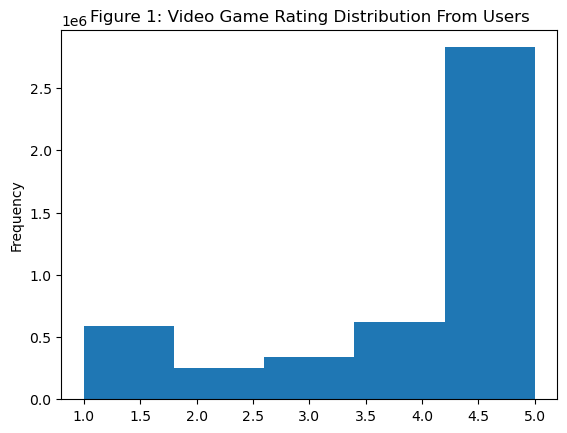

In [5]:
df1['rating'].plot(kind='hist', bins=5, title='Figure 1: Video Game Rating Distribution From Users') 

## Data Selecting, Cleaning, and Transformation

In [6]:
### Only focus on the verified purchase reviews and randomly sample 250,000 reviews since the dataset is too large
clean_df1 = df1[df1['verified_purchase'] == True].sample(n=250000, random_state=42).reset_index().drop(columns=['verified_purchase', 'index'])
### Transform the image column to True/False
clean_df1['has_review_image'] = clean_df1['images'].apply(lambda x: 1 if len(x) != 0 else 0)
clean_df1.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,has_review_image
0,5.0,Nice product.,They do the job. Nice product.,[],B01N1N0VQ1,B07FR9JSN7,AH2ZBEKCR5NKSRTW4MISMNZK7W4Q,1508164670310,0,0
1,5.0,"Would recommend, but a little big.",I received the product this week and will upda...,[],B00Y824ZZ2,B098NVRQW2,AESPLXQWG7KUQADGERQ3WQU4ZKUQ,1457712940000,0,0
2,3.0,Hurts to wear,"Far as noise cancellation and sound quality, t...",[],B08FX35S7K,B0C3C23NH9,AH5HU6QZRZDNJBOUIWN6BB56RYMQ,1655717695991,1,0
3,5.0,Better than what they say,I was half tempted to wait on this one but I b...,[],B08PK6RJ72,B08PK6TG7Y,AEDO4CXKW7E7P3JTST4T2YCVFYLA,1617878727669,0,0
4,1.0,Garbage knock offs,Save your money .Buy the real thing .,[],B07NR3M3V1,B0C2K279P4,AEXXYJXYWATUY63NCQSL3D6IMLHA,1620940978691,0,0


<AxesSubplot:title={'center':'Figure 2: Video Game Rating Distribution From Users From Sample Data'}, ylabel='Frequency'>

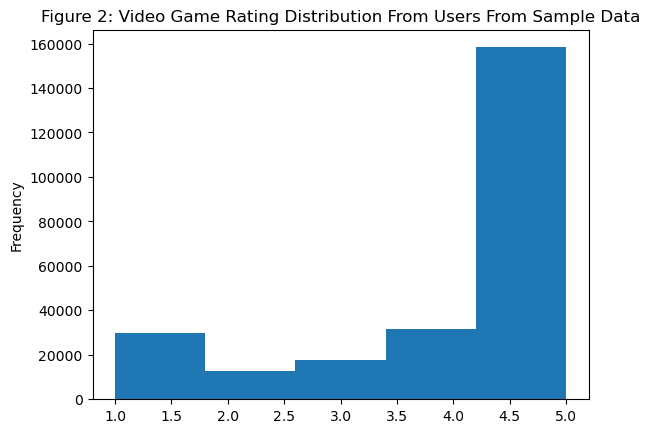

In [7]:
clean_df1['rating'].plot(kind='hist', bins=5, title='Figure 2: Video Game Rating Distribution From Users From Sample Data') 

In [8]:
### Transform the rating to positive(1) and negative(0)
clean_df1['rating'] = clean_df1['rating'].apply(lambda x: 1 if x > 4 else (0 if x > 2 else -1))

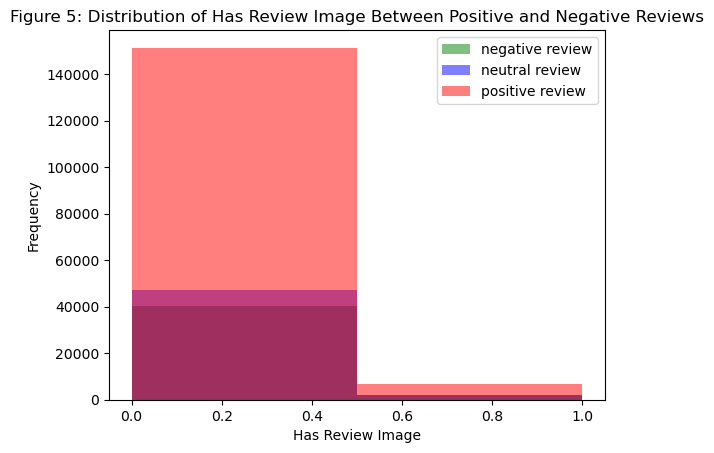

In [14]:
import matplotlib.pyplot as plt

plt.hist(
        clean_df1[clean_df1['rating'] == -1]['has_review_image'],
        bins=2, alpha=0.5, label='negative review', color="green", stacked=True
    )
plt.hist(
        clean_df1[clean_df1['rating'] == 0]['has_review_image'],
        bins=2, alpha=0.5, label='neutral review', color="blue", stacked=True
    )
plt.hist(
        clean_df1[clean_df1['rating'] == 1]['has_review_image'],
        bins=2, alpha=0.5, label='positive review', color='red', stacked=True
    )

plt.title('Figure 5: Distribution of Has Review Image Between Positive and Negative Reviews')
plt.xlabel("Has Review Image")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [13]:
### shows the proportion of negative reviews with image is a bit higher than the positive reviews with image
(clean_df1.groupby(['rating', 'has_review_image']).size().unstack().rename(index={1: 'positive', 0: 'neutral', -1: 'negative'}, columns={1: 'yes', 0: 'no'}),
clean_df1.groupby(['rating', 'has_review_image']).size().unstack().apply(lambda x: x / x.sum(), axis=1).rename(index={1: 'positive', 0: 'neutral', -1: 'negative'}, columns={1: 'yes', 0: 'no'}))

(has_review_image      no   yes
 rating                        
 negative           40360  2207
 neutral            47207  1924
 positive          151413  6889,
 has_review_image        no       yes
 rating                              
 negative          0.948152  0.051848
 neutral           0.960839  0.039161
 positive          0.956482  0.043518)

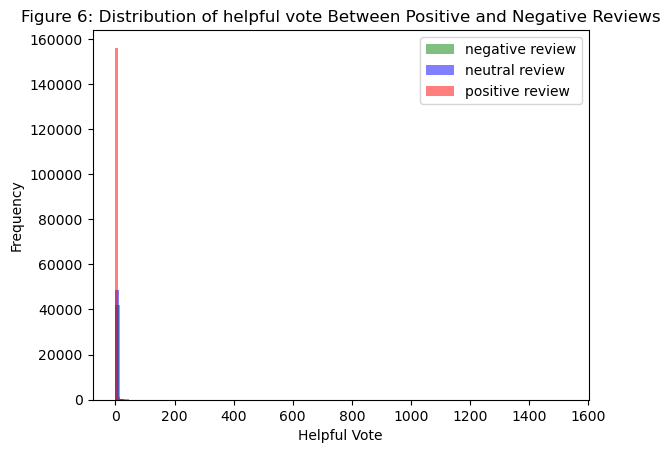

In [15]:
import matplotlib.pyplot as plt
plt.hist(
        clean_df1[clean_df1['rating'] == -1]['helpful_vote'],
        bins=100, alpha=0.5, label='negative review', color="green", stacked=True
    )
plt.hist(
        clean_df1[clean_df1['rating'] == 0]['helpful_vote'],
        bins=100, alpha=0.5, label='neutral review', color="blue", stacked=True
    )
plt.hist(
        clean_df1[clean_df1['rating'] == 1]['helpful_vote'],
        bins=100, alpha=0.5, label='positive review', color='red', stacked=True
    )

plt.title('Figure 6: Distribution of helpful vote Between Positive and Negative Reviews')
plt.xlabel("Helpful Vote")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [16]:
clean_df1.groupby(['rating'])['helpful_vote'].describe().rename(index={1: 'positive', 0: 'neutral', -1: 'negative'})

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
negative,42567.0,1.527028,11.733952,0.0,0.0,0.0,1.0,1524.0
neutral,49131.0,0.978527,10.639052,0.0,0.0,0.0,1.0,1259.0
positive,158302.0,0.650693,6.372601,-1.0,0.0,0.0,0.0,837.0


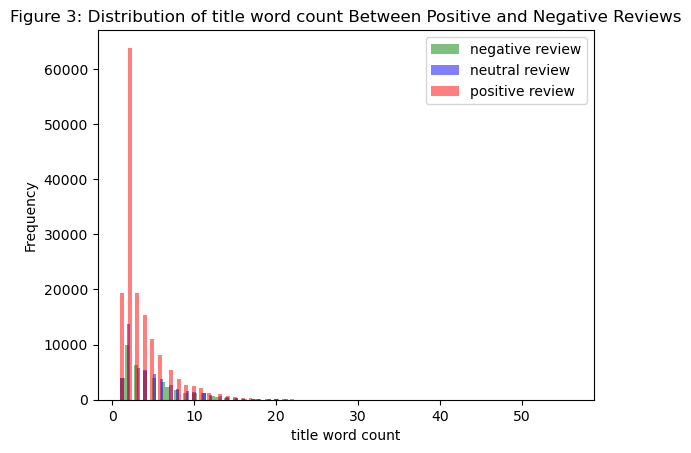

In [11]:
plt.hist(
        clean_df1[clean_df1['rating'] == -1]['title_wordcount'],
        bins=100, alpha=0.5, label='negative review', color="green", stacked=True
    )
plt.hist(
        clean_df1[clean_df1['rating'] == 0]['title_wordcount'],
        bins=100, alpha=0.5, label='neutral review', color="blue", stacked=True
    )
plt.hist(
        clean_df1[clean_df1['rating'] == 1]['title_wordcount'],
        bins=100, alpha=0.5, label='positive review', color='red', stacked=True
    )

plt.title('Figure 3: Distribution of title word count Between Positive and Negative Reviews')
plt.xlabel("title word count")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [17]:
clean_df1.groupby(['rating'])['title_wordcount'].describe().rename(index={1: 'positive', 0: 'neutral', -1: 'negative'})

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
negative,42567.0,4.790800,3.573100,1.0,2.0,4.0,6.0,56.0
neutral,49131.0,4.812400,3.641764,1.0,2.0,4.0,6.0,41.0
positive,158302.0,3.661312,2.994905,1.0,2.0,2.0,5.0,47.0


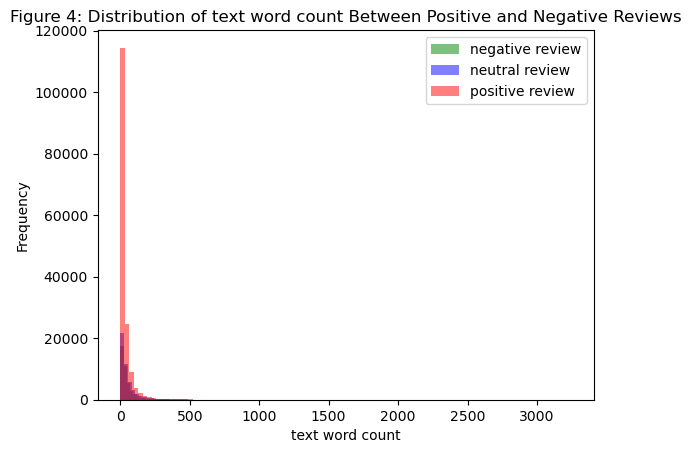

In [13]:
plt.hist(
        clean_df1[clean_df1['rating'] == -1]['text_wordcount'],
        bins=100, alpha=0.5, label='negative review', color="green", stacked=True
    )
plt.hist(
        clean_df1[clean_df1['rating'] == 0]['text_wordcount'],
        bins=100, alpha=0.5, label='neutral review', color="blue", stacked=True
    )
plt.hist(
        clean_df1[clean_df1['rating'] == 1]['text_wordcount'],
        bins=100, alpha=0.5, label='positive review', color='red', stacked=True
    )

plt.title('Figure 4: Distribution of text word count Between Positive and Negative Reviews')
plt.xlabel("text word count")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [18]:
clean_df1.groupby(['rating'])['text_wordcount'].describe().rename(index={1: 'positive', 0: 'neutral', -1: 'negative'})

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
negative,42567.0,52.146733,81.043580,0.0,14.0,30.0,60.0,2346.0
neutral,49131.0,63.961959,109.060499,0.0,15.0,33.0,70.0,2717.0
positive,158302.0,33.075975,64.669572,0.0,6.0,16.0,36.0,3247.0


<AxesSubplot:title={'center':'Figure 2: Number of Reviews for Each Rating On Sample'}, xlabel='rating'>

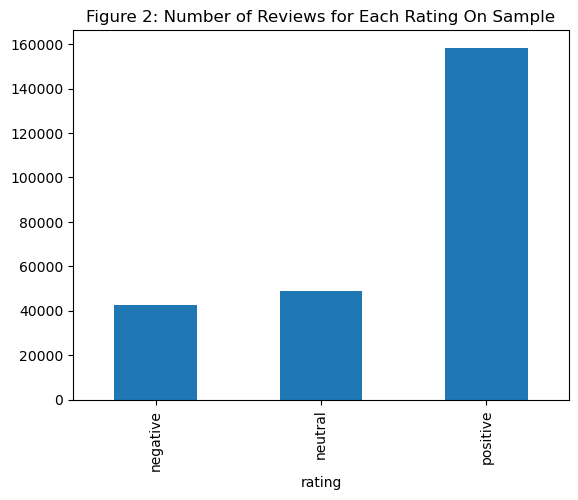

In [8]:
clean_df1.groupby('rating')['title'].count().rename(index={1: 'positive', 0: 'neutral', -1: 'negative'}).plot(kind='bar', title='Figure 2: Number of Reviews for Each Rating On Sample')

In [ ]:
clean_df1.to_csv('sample_video_game_reviews.csv', index=False)

## Train Test Split

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

clean_df1 = pd.read_csv('sample_video_game_reviews.csv')
clean_df1['title'] = clean_df1['title'].astype(str)
clean_df1['text'] = clean_df1['text'].astype(str)
clean_df1['title_wordcount'] = clean_df1['title'].apply(lambda x: len(x.split()))
clean_df1['text_wordcount'] = clean_df1['text'].apply(lambda x: len(x.split())) 
X = clean_df1[['title', 'text', 'helpful_vote', 'has_review_image', 'title_wordcount', 'text_wordcount']]
y = clean_df1['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((200000, 6), (50000, 6), (200000,), (50000,))

## Text Vectorization

In [2]:
import nltk
import numpy as np
nltk.download('punkt') # downloads you a model

nltk.download('stopwords') # <--- this is new
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer 
ps = PorterStemmer() 

# return a list of tokens
def pre_processing_by_nltk(doc, stemming = True, need_sent = False):
    # step 1: get sentences
    sentences = sent_tokenize(doc)
    # step 2: get tokens
    tokens = []
    for sent in sentences:
        words = word_tokenize(sent)
        # step 3 (optional): stemming
        if stemming:
            words = [ps.stem(word) for word in words]
        if need_sent:
            tokens.append(words)
        else:
            tokens += words
    return [w.lower() for w in tokens if w.lower() not in stop]

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhangyihui/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhangyihui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Count Vectorization For title

In [18]:
def binary_feature_extractor(doc, vocab, IDF):
    tokens = pre_processing_by_nltk(doc)
    for i, token in enumerate(tokens):
        if token not in vocab:
            tokens[i] = '<UNK>'
    x = [0] * len(vocab)
    for token in set(tokens):
        token_id = vocab[token]
        x[token_id] = 1 # this will be a dense matrix
    return x

In [19]:
from collections import defaultdict
from tqdm import tqdm
DF = defaultdict(float)
for doc in tqdm(X_train['title']):
    tokens = pre_processing_by_nltk(doc)
    for token in set(tokens):
        DF[token] += 1

from math import log
IDF, vocab = dict(), dict()
for token in DF:
    if DF[token] < 50:
        # this becomes an unk
        pass
    else:
        vocab[token] = len(vocab)
        IDF[token] = log(1 + len(X_train['title']) / DF[token])
IDF['<UNK>'] = 1
vocab['<UNK>'] = len(vocab)
print(len(DF), len(vocab))

X_train_title3 = []
for doc in tqdm(X_train['title']):
    X_train_title3.append(binary_feature_extractor(doc, vocab, IDF))
X_train_title3 = np.array(X_train_title3)

X_test_title3 = []
for doc in tqdm(X_test['title']):
    X_test_title3.append(binary_feature_extractor(doc, vocab, IDF))
X_test_title3 = np.array(X_test_title3)

100%|██████████| 200000/200000 [00:11<00:00, 16905.34it/s]


17751 1110


100%|██████████| 50000/50000 [00:03<00:00, 14284.80it/s]


### Count Vectorization For text

In [20]:
from collections import defaultdict
from tqdm import tqdm
DF = defaultdict(float)
for doc in tqdm(X_train['text']):
    tokens = pre_processing_by_nltk(doc)
    for token in set(tokens):
        DF[token] += 1

from math import log
IDF, vocab = dict(), dict()
for token in DF:
    if DF[token] < 50:
        # this becomes an unk
        pass
    else:
        vocab[token] = len(vocab)
        IDF[token] = log(1 + len(X_train['text']) / DF[token])
IDF['<UNK>'] = 1
vocab['<UNK>'] = len(vocab)
print(len(DF), len(vocab))

X_train_text3 = []
for doc in tqdm(X_train['text']):
    X_train_text3.append(binary_feature_extractor(doc, vocab, IDF))
X_train_text3 = np.array(X_train_text3)

X_test_text3 = []
for doc in tqdm(X_test['title']):
    X_test_text3.append(binary_feature_extractor(doc, vocab, IDF))
X_test_text3 = np.array(X_test_text3)

100%|██████████| 200000/200000 [01:22<00:00, 2434.36it/s]


75961 4204


100%|██████████| 50000/50000 [00:04<00:00, 12139.79it/s]


### TF-IDF Vectorization For title

In [3]:
def tfidf_feature_extractor(doc, vocab, IDF):
    tokens = pre_processing_by_nltk(doc)
    for i, token in enumerate(tokens):
        if token not in vocab:
            tokens[i] = '<UNK>'
    TF = defaultdict(int)
    for token in tokens:
        TF[token] += 1
    x = [0] * len(vocab)
    for token in set(tokens):
        tfidf = log(TF[token] + 1) * IDF[token]
        token_id = vocab[token]
#         print(token, TF[token], IDF[token])
        x[token_id] = tfidf # this will be a dense matrix
    return x

In [4]:
from collections import defaultdict
from tqdm import tqdm
DF = defaultdict(float)
for doc in tqdm(X_train['title']):
    tokens = pre_processing_by_nltk(doc)
    for token in set(tokens):
        DF[token] += 1

from math import log
IDF, vocab = dict(), dict()
for token in DF:
    if DF[token] < 50:
        # this becomes an unk
        pass
    else:
        vocab[token] = len(vocab)
        IDF[token] = log(1 + len(X_train['title']) / DF[token])
IDF['<UNK>'] = 1
vocab['<UNK>'] = len(vocab)
print(len(DF), len(vocab))

X_train_title = []
for doc in tqdm(X_train['title']):
    X_train_title.append(tfidf_feature_extractor(doc, vocab, IDF))
X_train_title = np.array(X_train_title)

X_test_title = []
for doc in tqdm(X_test['title']):
    X_test_title.append(tfidf_feature_extractor(doc, vocab, IDF))
X_test_title = np.array(X_test_title)

100%|██████████| 200000/200000 [00:11<00:00, 16771.88it/s]


17751 1110


100%|██████████| 50000/50000 [00:03<00:00, 15339.83it/s]


### TF-IDF Vectorization For text

In [5]:
DF = defaultdict(float)
for doc in tqdm(X_train['text']):
    tokens = pre_processing_by_nltk(doc)
    for token in set(tokens):
        DF[token] += 1

from math import log
IDF, vocab = dict(), dict()
for token in DF:
    if DF[token] < 50:
        # this becomes an unk
        pass
    else:
        vocab[token] = len(vocab)
        IDF[token] = log(1 + len(X_train['text']) / DF[token])
IDF['<UNK>'] = 1
vocab['<UNK>'] = len(vocab)
print(len(DF), len(vocab))

X_train_text = []
for doc in tqdm(X_train['text']):
    X_train_text.append(tfidf_feature_extractor(doc, vocab, IDF))
X_train_text = np.array(X_train_text)

X_test_text = []
for doc in tqdm(X_test['text']):
    X_test_text.append(tfidf_feature_extractor(doc, vocab, IDF))
X_test_text = np.array(X_test_text)

100%|██████████| 200000/200000 [01:21<00:00, 2462.93it/s]


75961 4204


100%|██████████| 50000/50000 [00:22<00:00, 2214.24it/s]


### Word2Vec Vectorization For title and text

In [6]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300') # the download could take you some time

def doc2vec(doc, wv):
    vecs = []
    for token in doc.split():
        try:
            vecs.append(wv[token])
        except KeyError:
            pass
    return np.mean(vecs, axis=0)

def fix_to_2000d(item):
    if isinstance(item, (list, np.ndarray)):
        # pad/truncate if needed
        item = item[:3000]
        if len(item) < 3000:
            item = np.concatenate([item, [0.0]*(3000 - len(item))])
    else:
        # item is a scalar
        # Maybe you want a 2000D vector of zeros?
        new_item = np.zeros(3000, dtype=float)
        # or all zeros except the first dimension, etc.
        item = new_item
    return np.array(item, dtype=np.float32)

In [7]:
from tqdm import tqdm
X_train_title2 = []
for doc in tqdm(X_train['title']):
    X_train_title2.append(doc2vec(doc, wv))
cleaned = []
for row in X_train_title2:
    fixed_row = fix_to_2000d(row)
    cleaned.append(fixed_row)
X_train_title2 = np.stack(cleaned, axis=0)

X_test_title2 = []
for doc in tqdm(X_test['title']):
    X_test_title2.append(doc2vec(doc, wv))
cleaned = []
for row in X_test_title2:
    fixed_row = fix_to_2000d(row)
    cleaned.append(fixed_row)
X_test_title2 = np.stack(cleaned, axis=0)

X_train_text2 = []
for doc in tqdm(X_train['text']):
    X_train_text2.append(doc2vec(doc, wv))
cleaned = []
for row in X_train_text2:
    fixed_row = fix_to_2000d(row)
    cleaned.append(fixed_row)
X_train_text2 = np.stack(cleaned, axis=0)

X_test_text2 = []
for doc in tqdm(X_test['text']):
    X_test_text2.append(doc2vec(doc, wv))
cleaned = []
for row in X_test_text2:
    fixed_row = fix_to_2000d(row)
    cleaned.append(fixed_row)
X_test_text2 = np.stack(cleaned, axis=0)

  0%|          | 0/200000 [00:00<?, ?it/s]/Users/zhangyihui/miniforge3/envs/dsc80/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/zhangyihui/miniforge3/envs/dsc80/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 50000/50000 [00:02<00:00, 19892.97it/s]


In [11]:
print("X_train_title shape:", X_train_title.shape, X_train_title.dtype)
print("X_train_text shape:", X_train_text.shape, X_train_text.dtype)
print("X_train_title2 shape:", X_train_title2.shape, X_train_title2.dtype)
print("X_train_text2 shape:", X_train_text2.shape, X_train_text2.dtype)
print("X_test_title shape:", X_test_title.shape, X_test_title.dtype)
print("X_test_text shape:", X_test_text.shape, X_test_text.dtype)
print("X_test_title2 shape:", X_test_title2.shape, X_test_title2.dtype)
print("X_test_text2 shape:", X_test_text2.shape, X_test_text2.dtype)
print("X_train_title3 shape:", X_train_title3.shape, X_train_title3.dtype)
print("X_train_text3 shape:", X_train_text3.shape, X_train_text3.dtype)
print("X_test_title3 shape:", X_test_title3.shape, X_test_title3.dtype)
print("X_test_text3 shape:", X_test_text3.shape, X_test_text3.dtype)

X_train_title shape: (200000, 1110) float64
X_train_text shape: (200000, 4204) float64
X_train_title2 shape: (200000, 3000) float32
X_train_text2 shape: (200000, 3000) float32
X_test_title shape: (50000, 1110) float64
X_test_text shape: (50000, 4204) float64
X_test_title2 shape: (50000, 3000) float32
X_test_text2 shape: (50000, 3000) float32
X_train_title3 shape: (200000, 1110) int64
X_train_text3 shape: (200000, 4204) int64
X_test_title3 shape: (50000, 1110) int64
X_test_text3 shape: (50000, 4204) int64


## Model Training

In [6]:
### transform the rating to 0, 1, 2 from -1, 0, 1
y_train = y_train.replace({-1: 0, 0: 1, 1: 2})
y_test = y_test.replace({-1: 0, 0: 1, 1: 2})

### Count + Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

X_train_count = np.concatenate([X_train_title3, X_train_text3], axis=1)
X_test_count = np.concatenate([X_test_title3, X_test_text3], axis=1)

In [8]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_count, y_train)
y_pred = lr.predict(X_test_count)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

/Users/zhangyihui/miniforge3/envs/dsc80/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7683
F1 Score: 0.6382784377692804


### Count + XGBoost

In [9]:
import xgboost as xgb

xbg = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.3,
    random_state=42
)
xbg.fit(X_train_count, y_train)
y_pred = xbg.predict(X_test_count)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.74438
F1 Score: 0.5890848435379962


### TD-IDF + Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

X_train_tfidf = np.concatenate([X_train_title, X_train_text], axis=1)
X_test_tfidf = np.concatenate([X_test_title, X_test_text], axis=1)

In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_tfidf, y_train)
y_pred = lr.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

/Users/zhangyihui/miniforge3/envs/dsc80/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.81548
F1 Score: 0.7357475109189923


### TD-IDF + XGBoost

In [ ]:
import xgboost as xgb

xbg = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.3,
    random_state=42
)
xbg.fit(X_train_tfidf, y_train)
y_pred = xbg.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.8045
F1 Score: 0.7163353040536875


### Word2Vec + Logistic Regression

In [26]:
X_train_w2v = np.concatenate([X_train_title2, X_train_text2], axis=1)
X_test_w2v = np.concatenate([X_test_title2, X_test_text2], axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

lr = LogisticRegression(random_state=42)
lr.fit(X_train_w2v, y_train)
y_pred = lr.predict(X_test_w2v)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

/Users/zhangyihui/miniforge3/envs/dsc80/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.78302
F1 Score: 0.6825514681503789


### Word2Vec + XGBoost

In [ ]:
import xgboost as xgb

xbg = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.3,
    random_state=42
)
xbg.fit(X_train_w2v, y_train)
y_pred = xbg.predict(X_test_w2v)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.8026
F1 Score: 0.7165058905153868


## Adding more features to our best model

In [8]:
X_train_final = np.concatenate([X_train_tfidf, np.array(X_train[['has_review_image', 'title_wordcount', 'text_wordcount']])], axis=1)
X_test_final = np.concatenate([X_test_tfidf, np.array(X_test[['has_review_image', 'title_wordcount', 'text_wordcount']])], axis=1)

In [9]:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

lr = LogisticRegression(random_state=42)
lr.fit(X_train_final, y_train)
y_pred = lr.predict(X_test_final)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

/Users/zhangyihui/miniforge3/envs/dsc80/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.81186
F1 Score: 0.7301281557670521


In [10]:
import xgboost as xgb

xbg = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.3,
    random_state=42
)

xbg.fit(X_train_final, y_train)
y_pred = xbg.predict(X_test_final)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.8076
F1 Score: 0.7217369798949688


### TF-IDF + Word2Vec + Logistic Regression

In [8]:
X_train_combine = np.concatenate([X_train_title, X_train_text, X_train_title2, X_train_text2], axis=1)
X_test_combine = np.concatenate([X_test_title, X_test_text, X_test_title2, X_test_text2], axis=1)

: 

In [27]:
X_train_combine = np.concatenate([X_train_tfidf, X_train_w2v], axis=1)
X_test_combine = np.concatenate([X_test_tfidf, X_test_w2v], axis=1)

: 

In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_combine, y_train)
y_pred = lr.predict(X_test_combine)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

### TF-IDF + Word2Vec + XGBoost

In [ ]:
import xgboost as xgb

xbg = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.3,
    random_state=42
)
xbg.fit(X_train_combine, y_train)
y_pred = xbg.predict(X_test_combine)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

: 